# Grocery Sales Performance & Customer Segmentation Analysis


**Dataset :** Supermart Grocery Sales - Retail Analytics Dataset

**Source :** Kaggle - Supermart Grocery Sales Dataset

The Supermart Grocery Sales - Retail Analytics Dataset covers grocery product sales data from 2015 to 2018, offering insights into customer purchases across regions, categories, and cities. The dataset contains detailed sales data from a grocery retail store, making it ideal for analyzing sales performance, customer segmentation, and trend analysis.



*   Number of Rows : Approximately 9994
*   Number of Columns : 11
*   Columns Include : Order ID, Customer Name, Product Category, Product Sub Category, City, Order Date, Region, Sales, Discount, Profit, State.



This dataset can help analyze:


*   Popular product categories and sub-categories across different years
*   Sales performance across regions and cities over time
*   Discount and pricing strategies and their impact on sales
*   Profitability trends by product type, location, and time period

# Exploratory Data Analysis (EDA) for Supermart Grocery Sales Dataset

The goal of the Exploratory Data Analysis (EDA) is to understand the underlying structure of the dataset, detect anomalies, and find patterns. Below, I will go through the necessary steps to clean the data and perform a detailed analysis.

## Data Overview

The first step is to get a quick overview of the dataset. This gives an initial understanding of the dataset's structure, including the number of rows, columns, data types, sample data, and basic statistics.

### Actions:
- **Shape**: Checking the number of rows and columns in the dataset.
- **Data types**: Understanding the data types for each column (e.g., numeric, categorical).
- **Preview**: Displaying the first and last few rows of the data to get an idea of how it looks.
- **Summary Statistics**: Providing a statistical summary for the numerical features.

*First we have to  imports essential libraries for data analysis and visualization:
pandas for data manipulation, numpy for numerical operations, matplotlib.pyplot for creating visualizations, and seaborn for enhanced statistical graphics.*

In [ ]:
import pandas as pd
import numpy as np  # Importing numpy to use np.inf
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = r'/content/Supermart Grocery Sales - Retail Analytics Dataset.csv'
df = pd.read_csv(url)

# Step 1: Data Overview
print("Dataset Overview:")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nData Types of Each Column:")
print(df.dtypes)
print("\nInitial Data Preview:")
print("\nTop 5 Rows:")
print(df.head())
print("\nBottom 5 Rows:")
print(df.tail())
print("\nSummary Statistics:")
print(df.describe())

Dataset Overview:
Number of Rows: 9994
Number of Columns: 11

Data Types of Each Column:
Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

Initial Data Preview:

Top 5 Rows:
  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  

# Data Preprocessing Steps:
**1. Handling Missing Values:**

Identified missing values and filled missing values in 'Category' and 'Sub Category' columns with mode.

**2. Removing Duplicates:**

Checked and removed duplicate rows from the dataset.

**3. Correcting Data Types:**

Converted 'Order Date' to datetime format, filled missing values with '2000-01-01', and extracted year and month for trend analysis to analyze sales over time.

**4. Creating Derived Columns:**

Created 'Profit Margin' by calculating the ratio of 'Profit' to 'Sales' and 'Sales Category' based on defined sales ranges: Low, Medium, High, Very High, and Premium. This will helps to evaluate how much profit is generated per sale.

**5. Filtering and Aggregating Data:**

Filtered rows with sales greater than 1000 and aggregated sales by 'Category' and 'Region' for performance analysis. This classifies sales into meaningful categories, making it easier to analyze different levels of sales performance.

In [ ]:
# Step 2: Handle Missing Values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Fill missing values for categorical columns
df['Category'] = df['Category'].fillna(df['Category'].mode()[0])
df['Sub Category'] = df['Sub Category'].fillna(df['Sub Category'].mode()[0])

# Display the DataFrame after filling missing values
print("\nDataFrame after filling missing values with mode:")
print(df.head())

# Step 3: Remove Duplicates
print("\nNumber of duplicates before removal:")
print(df.duplicated().sum())

# Dropping duplicates
df.drop_duplicates(inplace=True)

# Step 4: Correct Data Types
df['Order Date'] = df['Order Date'].astype(str).str.strip()
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce')

# Fill NaT values with a default date
df['Order Date'] = df['Order Date'].fillna(pd.to_datetime('2000-01-01'))

# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Creating a derived column 'Profit Margin' and 'Sales Category'
df['Profit Margin'] = np.where(df['Sales'] > 0, df['Profit'] / df['Sales'], 0)
df['Sales Category'] = pd.cut(df['Sales'], bins=[0, 500, 1000, 5000, 10000, np.inf], labels=['Low', 'Medium', 'High', 'Very High', 'Premium'])

# Preview the updated DataFrame
print("\nPreview of the updated DataFrame after EDA:")
print(df.head())

# Step 5: Filtering or Aggregating Data
# Filter data where sales > 1000
df_filtered = df[df['Sales'] > 1000]

# Aggregate sales by 'Category' and 'Region'
sales_by_category_region = df.groupby(['Category', 'Region'])['Sales'].sum().reset_index()
print("\nAggregated Sales by Category and Region:")
print(sales_by_category_region)

# Final check after cleaning and pre-processing
print("\nData after cleaning and pre-processing:")
print(df.info())
df


Missing values in each column:
Order ID          0
Customer Name     0
Category          0
Sub Category      0
City              0
Order Date        0
Region            0
Sales             0
Discount          0
Profit            0
State             0
Year              0
Month             0
Profit Margin     0
Sales Category    0
dtype: int64

DataFrame after filling missing values with mode:
  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Order Date Region  Sales  Discount  Profit       State  Year  Month  \
0 2017-08-11  North   1254      0.12  401.28  Tamil Nadu  2017      

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Month,Profit Margin,Sales Category
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2000-01-01,North,1254,0.12,401.28,Tamil Nadu,2000,1,0.32,High
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2000-01-01,South,749,0.18,149.80,Tamil Nadu,2000,1,0.20,Medium
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2000-01-01,West,2360,0.21,165.20,Tamil Nadu,2000,1,0.07,High
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2000-01-01,South,896,0.25,89.60,Tamil Nadu,2000,1,0.10,Medium
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2000-01-01,South,2355,0.26,918.45,Tamil Nadu,2000,1,0.39,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2000-01-01,West,945,0.16,359.10,Tamil Nadu,2000,1,0.38,Medium
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2000-01-01,West,1195,0.26,71.70,Tamil Nadu,2000,1,0.06,High
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2000-01-01,West,1567,0.16,501.44,Tamil Nadu,2000,1,0.32,High
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2000-01-01,West,1659,0.15,597.24,Tamil Nadu,2000,1,0.36,High



#Univariate Analysis: Analyzing the distribution of Sales

# 1. Histogram for Sales distribution

A histogram allows us to observe the frequency distribution of sales values, helping to identify if the sales are skewed in any particular direction.

Here, the plot displays sales data distribution using a histogram and KDE curve. Sales values are spread across a wide range, with the most frequent sales in the middle.

The plot shows a slight left skewness, with most sales concentrated in the middle and a longer tail on the left.

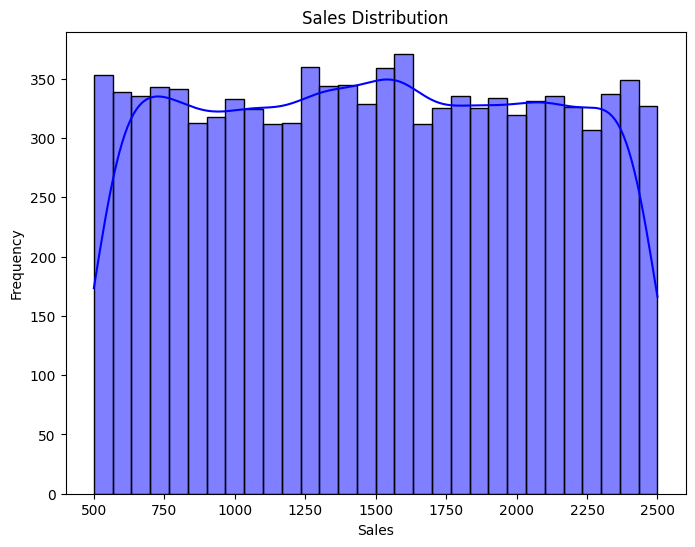

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Sales'], kde=True, bins=30, color='blue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# 2a. Box Plot for Sales distribution by Region
**Bivariate Analysis: Analyzing relationships between Sales and Profit, and Discount and Profit.**

We can visualize the **Sales distribution by Region** using a **Box Plot**.
Box plots show the median, quartiles, and potential outliers for each region.
This will help us compare the sales distribution across different regions and
identify any variations or anomalies.

# 2a1. IQR Method for Outlier Detection and Removal


The IQR method detects and removes outliers by calculating the first (Q1) and third quartiles (Q3) to determine the IQR. Outliers are values below
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR or above
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR. Removing outliers ensures cleaner, more reliable data for analysis.

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'Sales' column
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)

# Calculate the IQR for the 'Sales' column
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering rows that are outside the bounds
data_cleaned = df[~((df['Sales'] < lower_bound) | (df['Sales'] > upper_bound))]

# Verify the cleaned dataset
data_cleaned.shape  # Shows the number of rows after outlier removal


(9994, 15)

In [ ]:
# Calculate the frequency of each category in the 'Region' column
region_counts = df['Region'].value_counts()

# Define a threshold for rare categories (e.g., if a region occurs less than 5 times, consider it an outlier)
threshold = 5

# Filter out rare categories from the dataset
regions_to_keep = region_counts[region_counts >= threshold].index
df_cleaned_region = df[df['Region'].isin(regions_to_keep)]

# Verify the cleaned dataset
df_cleaned_region.shape  # Shows the number of rows after rare region removal


(9993, 15)

### After removing outliers, the boxplot illustrates the sales distribution across various regions. It shows that the North region has only one remaining row, while all other regions (South, West, Central, East) have similar sales ranges, with the median around 1500.

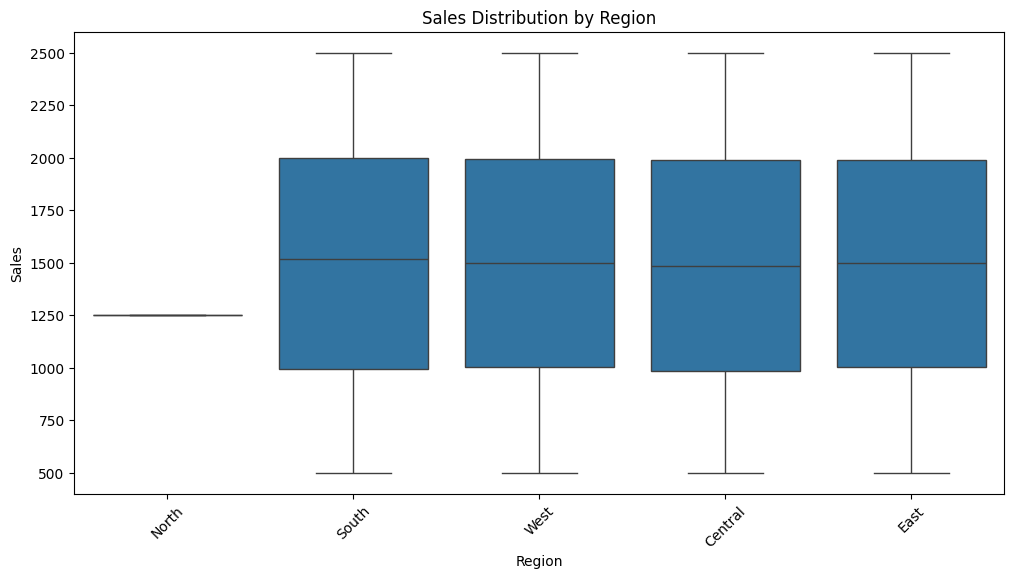

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region', y='Sales')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

# 2b. Boxplot Visualization of Sales, Discount, and Profit Distribution

The boxplot displays the distribution of Sales, Discount, and Profit, highlighting the median, quartiles, and outliers. It helps identify trends, variations, and extreme values for further analysis.

# 2b1. IQR Method for Outlier Detection and Removal

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each relevant column
Q1 = df[['Sales', 'Discount', 'Profit']].quantile(0.25)
Q3 = df[['Sales', 'Discount', 'Profit']].quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering rows that are outside the bounds
data_cleaned = df[~((df[['Sales', 'Discount', 'Profit']] < lower_bound) |
                      (df[['Sales', 'Discount', 'Profit']] > upper_bound)).any(axis=1)]

# Verify the cleaned dataset
data_cleaned.shape  # Shows the number of rows after outlier removal

(9951, 15)

### After removing outliers, the boxplot shows the distribution of 'Sales', 'Discount', and 'Profit'. Sales have high variability with outliers, Discount is consistent with little variation, and Profit has a tighter distribution with occasional outliers indicating spikes.

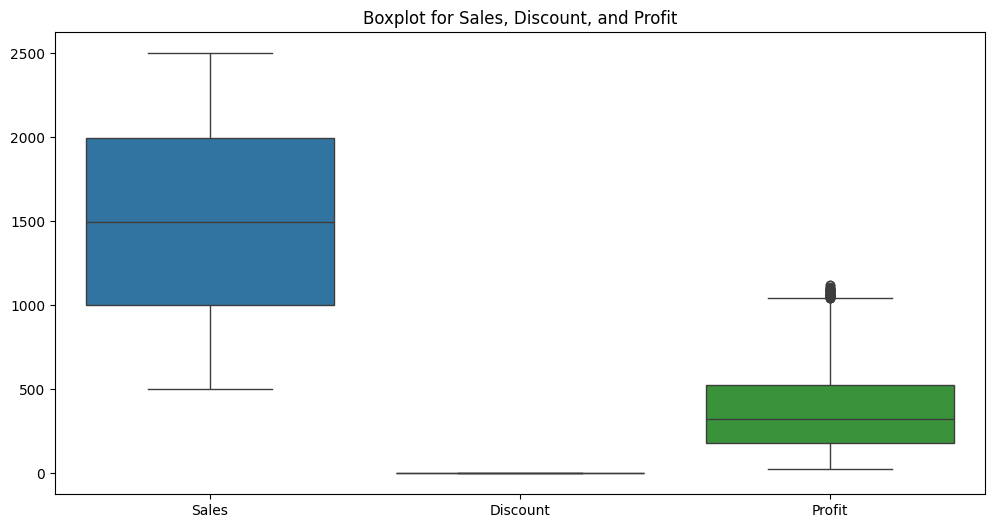

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Sales', 'Discount', 'Profit']])
plt.title('Boxplot for Sales, Discount, and Profit')
plt.xticks(ticks=[0, 1, 2], labels=['Sales', 'Discount', 'Profit'])
plt.show()

# 3. Pie Chart for Sales Category distribution

A **Pie Chart** will help us understand the proportion of sales in different
categories. Here, the pie chart visualizes the distribution of sales categories (Low, Medium, High) as a proportion of total sales. 74.9% of sales fall into "High," 25% into "Medium," and no sales are in the "Low" category.

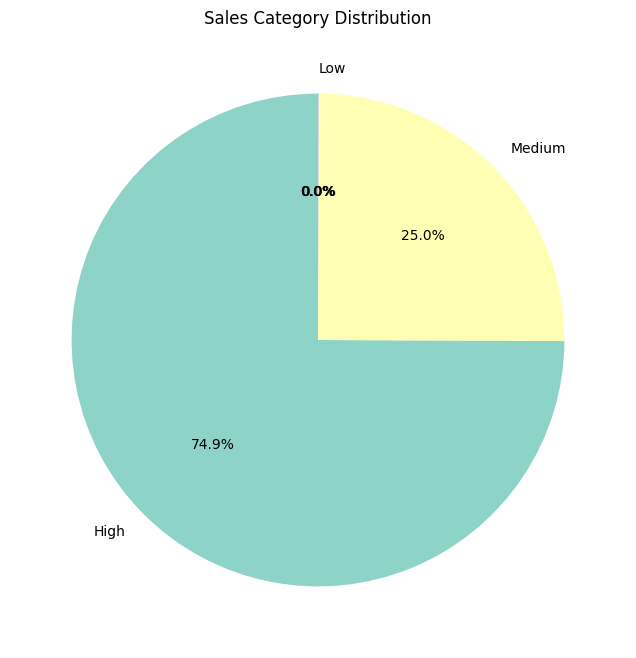

In [ ]:
sales_category_counts = df['Sales Category'].value_counts()
plt.figure(figsize=(8,6))
sales_category_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), colors=sns.color_palette("Set3"))
plt.title('Sales Category Distribution')
plt.ylabel('')  # Remove the y-label for better presentation
plt.show()

#Bivariate Visualizations

#4. Scatter plot for Sales vs Profit

The scatter plot shows a positive correlation between sales and profit. Different categories (e.g., Oil & Masala, Beverages) are color-coded, indicating how each category contributes to profit with increasing sales.


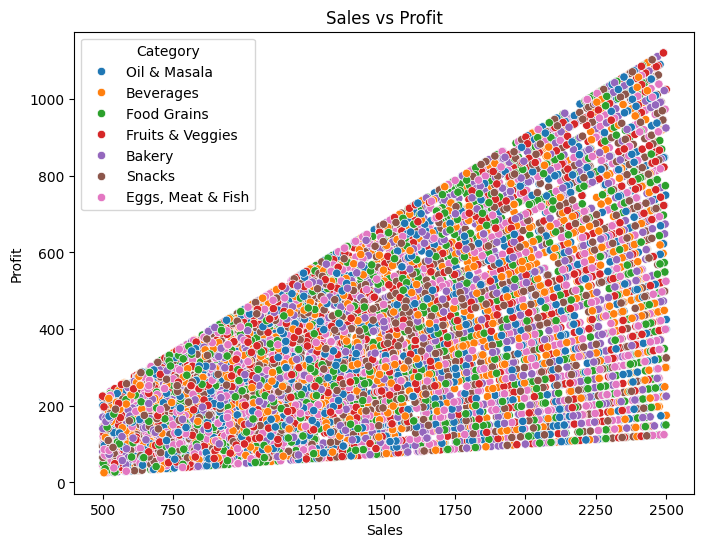

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# 5. Correlation Heatmap for Numerical Features between Discount and Profit

We will use a **Correlation Heatmap** to understand how these two variables
are related. Correlation helps us identify if higher discounts are linked
to higher or lower profits.

Here, The heatmap shows a very weak correlation between Discount and Profit (0.000017). The values are almost 0, indicating no significant relationship between these two variables.

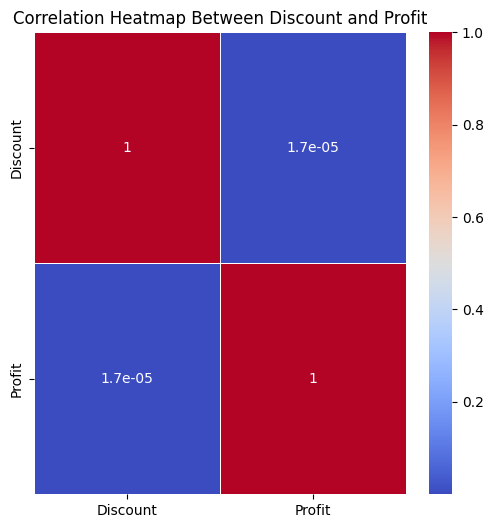

In [ ]:
# Select only the 'Discount' and 'Profit' columns for correlation
df_subset = df[['Discount', 'Profit']]

# Generate the correlation heatmap for 'Discount' and 'Profit'
plt.figure(figsize=(6,6))  # Smaller size as we're only plotting two variables
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Between Discount and Profit')
plt.show()

#Multivariate Visualizations

# 6. Pair Plot for numerical relationships between Sales, Profit, and Discount

A pair plot allows us to observe the pairwise relationships between these three variables and helps us identify any correlations or patterns.

Here, The pairplot shows relationships between Sales, Profit, and Discount:

Sales vs. Profit: There's a positive correlation, as higher sales generally lead to higher profit.

Sales vs. Discount: No clear pattern, indicating that discount levels don’t significantly affect sales.

Profit vs. Discount: No noticeable relationship between profit and discount.

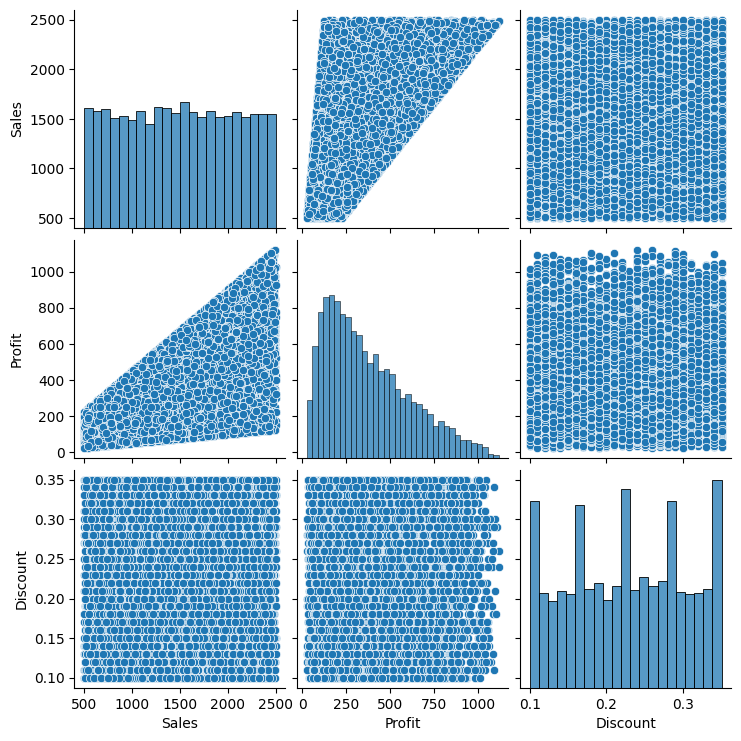

In [ ]:
sns.pairplot(df[['Sales', 'Profit', 'Discount']])
plt.show()



# 7. Line Chart for Monthly Sales Trend

To understand the trend of sales over time, create a **Line Chart** that
shows how sales have evolved month by month. Extract the **Year** and **Month**
from the **Order Date** and group the data by these variables to calculate total sales each month.

The line chart shows the monthly sales trend from 2015 to 2018. Sales increased steadily each year, with a significant spike in the later months, especially in 2018. The trend shows more pronounced growth towards the end of the year for all years, with 2018 having the highest sales in the final months.

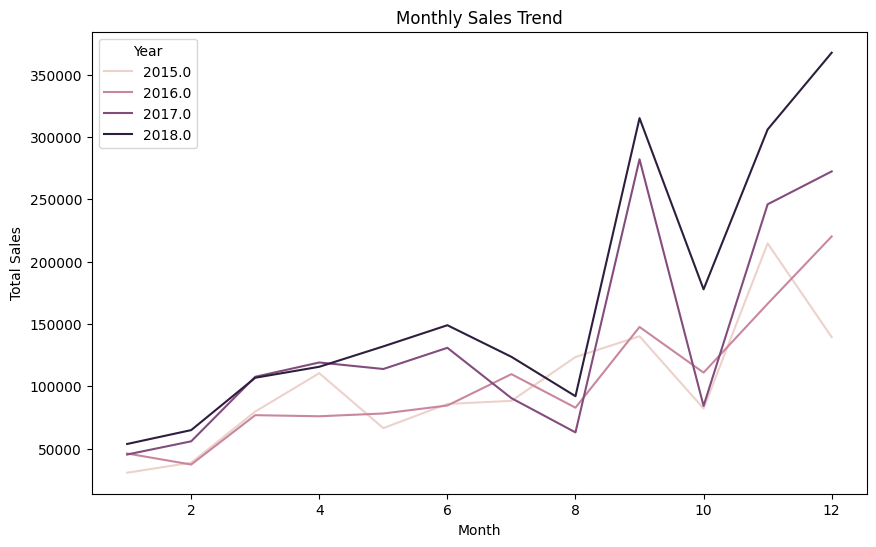

In [ ]:
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')  # Update the path if needed

# 7. Line Chart for Monthly Sales Trend
'''To understand the trend of sales over time, we will create a **Line Chart** that
shows how sales have evolved month by month. We will extract the **Year** and **Month**
from the **Order Date** and group the data by these variables to calculate total sales each month.'''

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract 'Year' and 'Month' from the 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month


# Group by 'Year' and 'Month', then sum 'Sales'
sales_by_year_month = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Generate the line chart for monthly sales trend
plt.figure(figsize=(10,6))
sns.lineplot(data=sales_by_year_month, x='Month', y='Sales', hue='Year')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

#Aggregated Data Visualizations

#8. Bar Plot for Total Sales by Category
The bar chart shows the total sales per category, with the height of each bar representing the sum of sales for each category. All categories (Oil & Masala, Beverages, Food Grains, etc.) have similar sales, ranging around 2 million, indicating relatively equal sales performance across these categories.


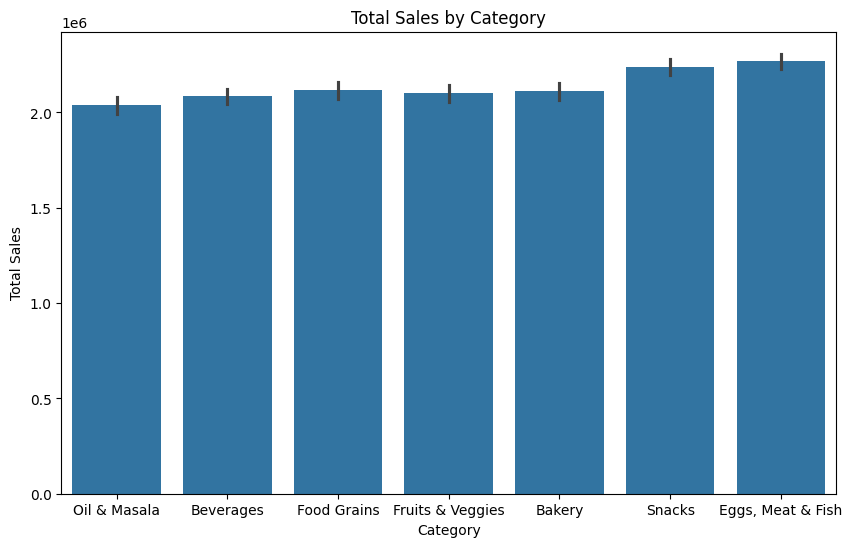

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category', y='Sales', estimator='sum')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

#9. Count Plot for Number of Orders by Category

The count plot shows the number of orders in each category, allowing comparison of order frequency across categories and understanding their distribution.

Here, it displays the number of orders by category, with each category (Oil & Masala, Beverages, Food Grains, Fruits & Veggies, Bakery, Snacks, and Eggs, Meat & Fish) having a slight differences only, ranging between 1000 and 1400.

/tmp/ipython-input-2460848201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')


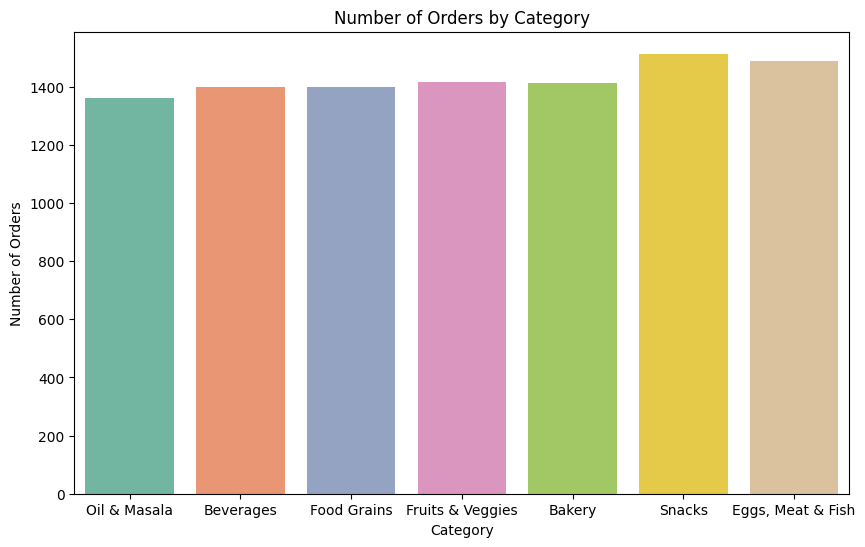

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Category', palette='Set2')
plt.title('Number of Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.show()

# 10. Violin Plot for Sales Distribution by Region
The violin plot visualizes the distribution of Sales across different Regions, combining aspects of a boxplot and a density plot.  It helps us understand the range, median, and the density of sales in different regions.

/tmp/ipython-input-1900398213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Region', y='Sales', palette='muted')


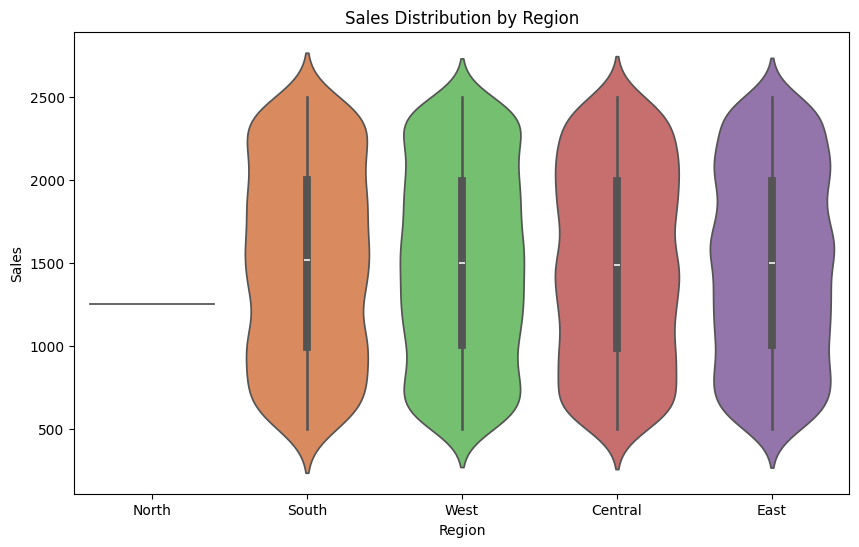

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Region', y='Sales', palette='muted')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

#11. Bar plot for Total Profit by Region

A bar plot is useful to compare the total profit in each region, helping us
understand which regions are the most profitable.

Here, the company earns the most profit in the West and East regions, while the South performs the worst, and the North doesn’t contribute at all.

/tmp/ipython-input-3878004117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y='Profit', estimator='sum', palette='coolwarm')


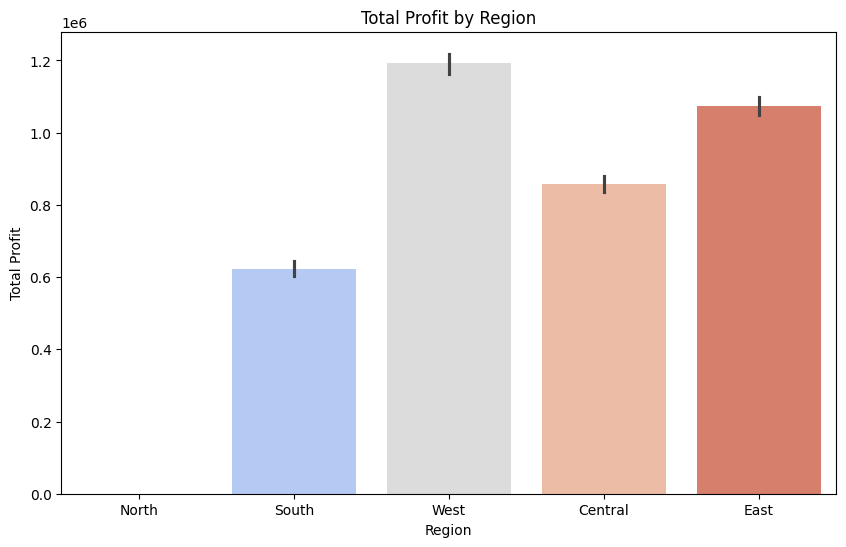

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Profit', estimator='sum', palette='coolwarm')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

#12. Histogram for Distribution of Discount

This histogram visualization helps us understand how discounts are spread across different orders.

The chart shows discounts are mostly given at fixed slabs like 10%, 15%, 20%, 25%, 30%, and 35%. Among these, 25% and 35% occur most frequently, meaning the company often offers higher discount levels in sales.

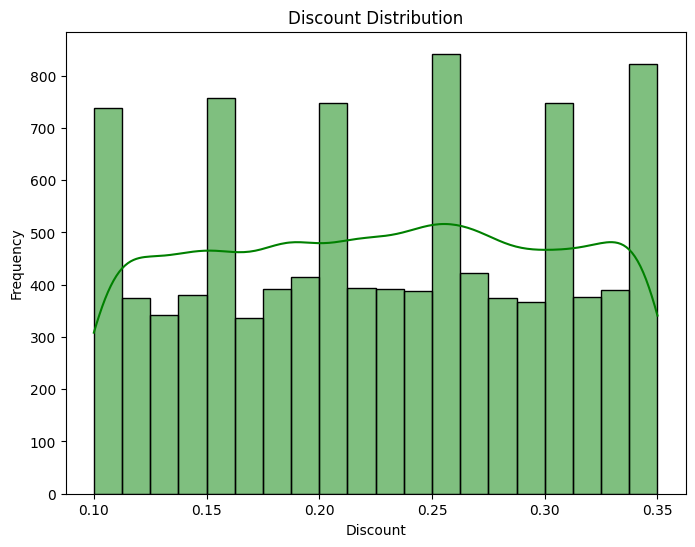

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Discount'], kde=True, bins=20, color='green')
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

#13. KDE Plot for Profit Margin distribution

Kernel Density Estimate (KDE) plot shows the smooth distribution of profit margins, helping us understand the density of values.

This plot is to visualize the distribution of the "Profit Margin" data. It helps to understand how profit margins are spread across different values, showing where most of the data points are concentrated and identifying trends or patterns.

/tmp/ipython-input-574539035.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Profit Margin'], color='red', shade=True)


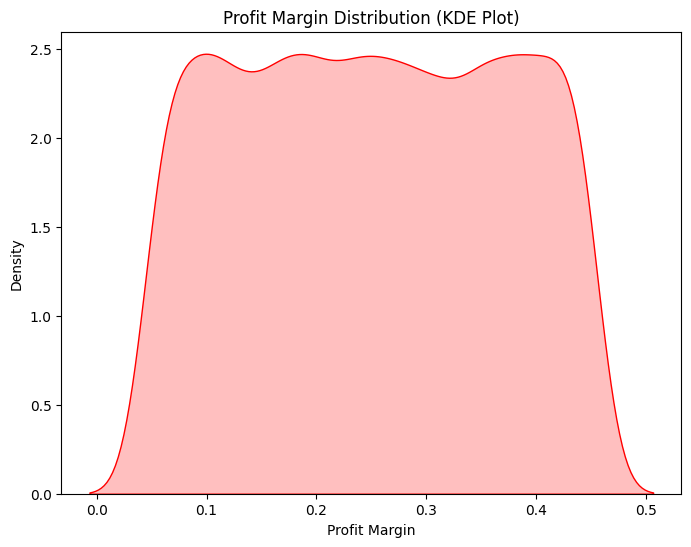

In [ ]:
# Create 'Profit Margin' as Profit / Sales (only if Sales > 0)
df['Profit Margin'] = df['Profit'] / df['Sales']

# Handle cases where 'Sales' might be zero or missing by replacing them with NaN
df['Profit Margin'] = df['Profit Margin'].fillna(np.nan)

# Now, fill the NaN values with the mean of 'Profit Margin'
mean_profit_margin = df['Profit Margin'].mean()
df['Profit Margin'] = df['Profit Margin'].fillna(mean_profit_margin)


plt.figure(figsize=(8,6))
sns.kdeplot(df['Profit Margin'], color='red', shade=True)
plt.title('Profit Margin Distribution (KDE Plot)')
plt.xlabel('Profit Margin')
plt.ylabel('Density')
plt.show()


# 14. Skewness Analysis for Sales, Discount, and Profit



Skewness measures the asymmetry of the distribution of data. A positive skew indicates that the data's right tail is longer or fatter, while a negative skew suggests the left tail is longer. A skewness value close to zero indicates a symmetric distribution.

To analyze the skewness for the **Sales**, **Discount**, and **Profit** columns, we calculated the skewness values using the following code:

In [ ]:
# Check skewness for Sales, Discount, and Profit
skewness = df[['Sales', 'Discount', 'Profit']].skew()

# Display the skewness values
print(skewness)


Sales       0.000927
Discount   -0.026487
Profit      0.767397
dtype: float64


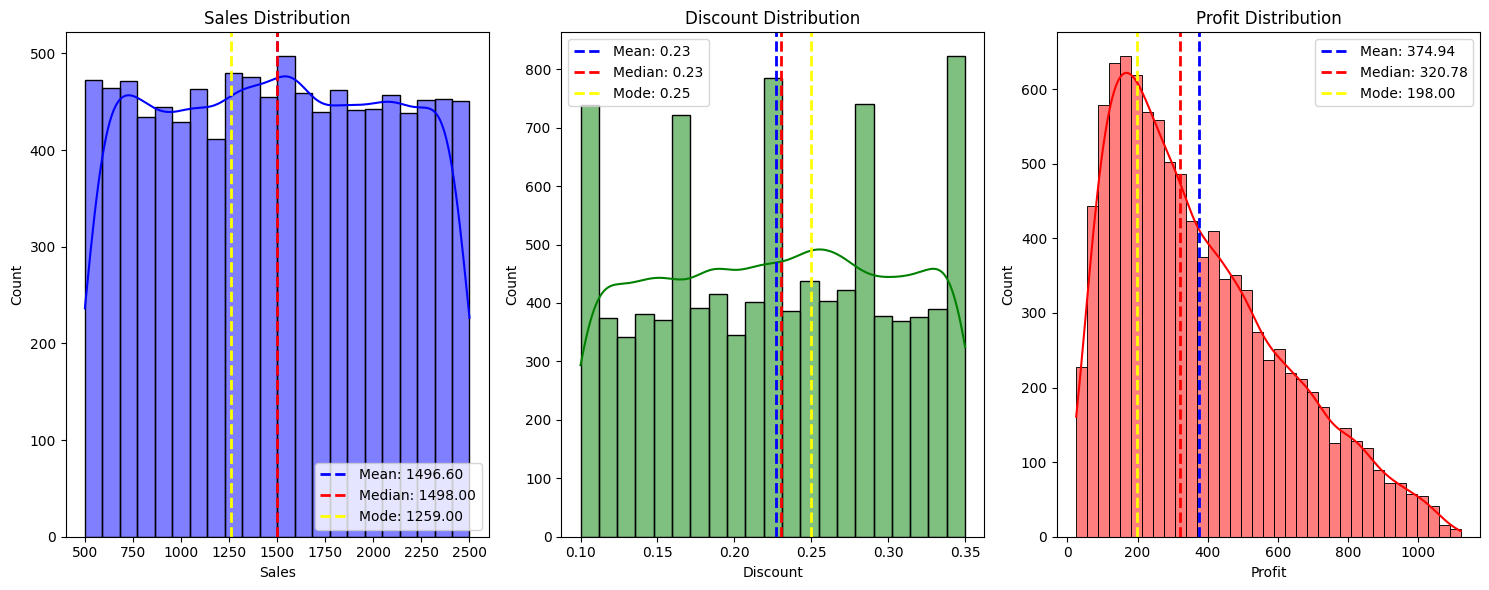

In [ ]:
# Calculate mean, median, and mode for each column
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
mode_sales = df['Sales'].mode()[0]

mean_discount = df['Discount'].mean()
median_discount = df['Discount'].median()
mode_discount = df['Discount'].mode()[0]

mean_profit = df['Profit'].mean()
median_profit = df['Profit'].median()
mode_profit = df['Profit'].mode()[0]

# Plot histograms for Sales, Discount, and Profit to visualize skewness
plt.figure(figsize=(15, 6))

# Sales histogram
plt.subplot(1, 3, 1)
sns.histplot(df['Sales'], kde=True, color='blue')
plt.axvline(mean_sales, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sales:.2f}')
plt.axvline(median_sales, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_sales:.2f}')
plt.axvline(mode_sales, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_sales:.2f}')
plt.title('Sales Distribution')
plt.legend()

# Discount histogram
plt.subplot(1, 3, 2)
sns.histplot(df['Discount'], kde=True, color='green')
plt.axvline(mean_discount, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_discount:.2f}')
plt.axvline(median_discount, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_discount:.2f}')
plt.axvline(mode_discount, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_discount:.2f}')
plt.title('Discount Distribution')
plt.legend()

# Profit histogram
plt.subplot(1, 3, 3)
sns.histplot(df['Profit'], kde=True, color='red')
plt.axvline(mean_profit, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_profit:.2f}')
plt.axvline(median_profit, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_profit:.2f}')
plt.axvline(mode_profit, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_profit:.2f}')
plt.title('Profit Distribution')
plt.legend()

plt.tight_layout()
plt.show()


After calculating the skewness values for the **Sales**, **Discount**, and **Profit** columns, we obtain the following insights into the distribution:


**Sales Distribution**: Sales have a slight left skew, with the mean (1496.60) slightly lower than the median (1498.00) and mode (1259.00). It means most sales are higher, with a few lower sales pulling the average down.

**Discount Distribution**: The discount data is symmetric, with the mean (0.23) and median (0.23) being close, and mode at 0.25. It means the discount values are evenly distributed, with the mean, median, and mode being similar.

**Profit Distribution**: Profit is right-skewed, with the mean (374.94) higher than the median (320.78) and mode (198.00), indicating a few higher-profit outliers. It means most profits are lower, with a few high-profit values affecting the average.

# Strategic Value of Insights
1. Optimized Sales Strategies:

	Understanding sales distribution and outliers helps businesses focus on high-value transactionsand tailor their pricing strategies for better profitability.

2. Improved Discounting Strategy:

	By analyzing the impact of discounts, businesses can optimize discount levels to maximize sales without harming profit margins.

3. Increased Profitability:

 Recognizing the right-skewed profit distribution allows businesses to focus on high-profit transactions and optimize for greater returns.

4. Targeted Regional Marketing:

	Identifying regional performance differences helps businesses prioritize high-potential regions and target underperforming areas with focused marketing campaigns.

5. Informed Seasonal Planning:

	Identifying seasonal trends helps businesses strategically plan marketing, inventory, and resources for high-demand periods.

6. Customer-Centric Marketing:

	Customer segmentation helps businesses tailor marketing and promotions, boosting engagement, loyalty, and conversions.